# 【ML-HW01】

#### 〈 Import Library 〉

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import math
from numpy.linalg import inv

#### 〈 Function define 〉

In [3]:
def loaddata(data_x, data_t):
    data_X = np.genfromtxt(data_x, delimiter=',')
    data_T = np.genfromtxt(data_t, delimiter=',')
    return data_X, data_T

def splitdata_M1(data_x, data_t, N, rate):
    train_num = round(N * rate)
    val_num = round(N * (1-rate))
    data_x_t_bias = np.ones((train_num, 1))
    data_x_t = np.append(data_x_t_bias, data_x[0:train_num,:], axis=1)
    data_x_v_bias = np.ones((val_num, 1))
    data_x_v = np.append(data_x_v_bias, data_x[train_num:,:], axis=1)
    data_t_t = data_t[0:train_num,:]
    data_t_v = data_t[train_num:,:]
    #print(data_x_t)
    return data_x_t, data_x_v, data_t_t, data_t_v

def splitdata_M2(data_x, data_t):
    data_x_t = data_x[0:400, :]
    data_x_v = data_x[400:, :]
    data_t_t = data_t[0:400,:]
    data_t_v = data_t[400:,:]
    return data_x_t, data_x_v, data_t_t, data_t_v

def linear_regression_1d_wml(data_x_t, data_t_t):
    x = np.linalg.inv(np.dot(np.transpose(data_x_t), data_x_t))
    wml_1d = np.linalg.multi_dot([x, np.transpose(data_x_t), data_t_t])
    return wml_1d

def linear_regression_post_wml(data_x_t, data_t_t):
    lambda_ = 0.01
    i = np.identity(data_x_t.shape[1]) * lambda_
    x = np.linalg.inv(i + np.dot(np.transpose(data_x_t), data_x_t))
    wml_post = np.linalg.multi_dot([x, np.transpose(data_x_t), data_t_t])
    return wml_post

def linear_regression_2d_wml(data_x_t, data_t_t):
    x = np.linalg.inv(np.dot(np.transpose(data_x_t), data_x_t))
    wml_1d = np.linalg.multi_dot([x, np.transpose(data_x_t), data_t_t])
    return wml_1d

def linear_regression_2d_wml_post(data_x_t, data_t_t):
    lambda_ = 0.01
    i = np.identity(data_x_t.shape[1]) * lambda_
    x = np.linalg.inv(i + np.dot(np.transpose(data_x_t), data_x_t))
    wml_2d_post = np.linalg.multi_dot([x, np.transpose(data_x_t), data_t_t])
    return wml_2d_post

def linear_regression_m2d(data_x_t):
    result = np.zeros((500,21))
    k = 0
    for i in range(6):
        for j in range(i,6):
            result[:,k] = (data_x_t[:, i] * data_x_t[:, j])
            k=k + 1
    return result 

def linear_regression_error(data_d, data_e, data_f, N, rate):
    train_num = round(N * rate)
    val_num = round(N * (1-rate))
    y = np.dot(data_d, data_e) - data_f
    z = y**2
    sum = np.sum(z)
    train_error = np.sqrt(sum/train_num)
    val_error = np.sqrt(sum/val_num)
    return train_error, val_error

def mean_std(training_set):
    mean = np.mean(training_set, axis=0)
    std = np.std(training_set)
    return mean, std


def normalization(training_set, mean, std):
    normalization_result = (training_set - mean) / std
    return normalization_result

def sigmoid_op(normalization_result):
    sigmoid_result = 1 / (1 + np.exp(-normalization_result))
    return sigmoid_result

#Calculate $\Phi$ to generate $x^{j}$  ; form y(x, $\omega$) = $\omega_{0}$+...+ $\omega_{1}$ $x^{1}$+...
#calculate phi for calculate weight
def phi_POLY(train_x):
    phi_for_M1 = np.insert(train_x, 0, np.ones(row), axis=1)
    
    phi_for_M2 = np.insert(train_x, 0, np.ones(row), axis=1)
    diff = 0
    p = len(train_x[0]) + 1 
    for i in range(len(train_x[0])):
        for j in range(len(train_x[0])):
            if i <= j:
                p += 1
                phi_for_M2 = np.insert(phi_for_M2, (i*(len(train_x[0])) + j + (len(train_x[0])) + 1 - diff), (train_x[:,i]*train_x[:,j]), axis=1)
            else:
                diff += 1
    diff = 0
    return (phi_for_M1, phi_for_M2)

def prediction(input_x, LABEL, m, weight):
    row = len(input_x)
    error_func = np.zeros(row)
    error_func += weight[0]
    l = len(input_x[0])
    p = l + 1
    for i in range(l):
        m1 = np.multiply(input_x[:, i], weight[i+1])      
        error_func += m1
    
    if m >= 2:
        diff = 0
        for i in range(l):
            for j in range(l):
                if i <= j:
                    p += 1
                    m2 = np.multiply(input_x[:, i], input_x[:, j])
                    error_func += np.multiply(m2, weight[i*l + j + l + 1 - diff])
                else:
                    diff += 1       
                    
    return math.sqrt(sum((error_func - LABEL)**2)/len(LABEL))

#### 〈Data preprocessing〉

In [4]:
# Load Data
dataset_t = pd.read_csv('/home/ShaoWenLC/ML/HW1/data_T.csv')
dataset_x = pd.read_csv('/home/ShaoWenLC/ML/HW1/data_X.csv')
print(f'train{dataset_x.shape}')
# data_X: (500, 8), data_T: (500, 1)
orgin_train_x = np.array(dataset_x[['GRE_score', 'TOFEL_score', 'University_rating', 'SOP','LOR ', 'CGPA', 'Research']])
orgin_train_t = np.array(dataset_t[['Chance_of_Admit ']])
# display(orgin_train_x)
num_data = orgin_train_x.shape[0]  #num of data
dim = orgin_train_x.shape[1]    #dimension

train(500, 8)


## 【Feature Selection (2-1) 】

In [206]:
#stack sequences along horizontal direction.
#All arrays must have the same shape along all but the second axis.
train_data = np.hstack((orgin_train_x, orgin_train_t.reshape(num_data,1)))
np.random.shuffle(train_data)
train_x = train_data[:, :-1]
train_t = train_data[:, -1]
#split data
# 1:4
test_x = train_x[int((-num_data)*2/10):]
test_t = train_t[int((-num_data)*2/10):]
train_x = train_x[:int(num_data*8/10)]
train_t = train_t[:int(num_data*8/10)]
num_train_data = train_x.shape[0]  # num of training data
print('Training data numbers =', num_train_data)
num_test_data = test_x.shape[0]    # num of testing data
print('Testing data numbers =', num_test_data)
row = len(train_x)

Training data numbers = 400
Testing data numbers = 100


//===================//
//       2-1(a)      //
//===================//
Weight：
〔when M = 1〕：
 [-1.23971982  0.00167088  0.0030644   0.00699538  0.0014761   0.01524818
  0.11780561  0.02552689]
〔when M = 2〕：
 [-7.37797022e+01  2.50595528e-01 -2.24735125e-02 -8.39152684e-01
 -1.15702146e-01  2.68060278e-02  3.76869319e-01  4.56426380e+02
  5.49294698e-05 -1.37359451e-04  3.06619537e-04 -5.40238467e-04
  1.49110745e-03 -1.89155007e-03 -8.27660662e-04  1.09462081e-04
  1.52627646e-04  2.82600486e-03 -2.16869344e-03 -2.27932421e-03
  3.04298847e-03 -8.21361939e-04  2.23149069e-02 -4.47408127e-03
 -1.51845847e-02  3.17109957e-03 -1.48611369e-02  2.64795234e-03
 -2.39071245e-03  5.57384039e-04  5.51099404e-03 -2.57794073e-02
 -6.51575428e-03  3.45245260e-02  1.52985037e-02 -4.56201147e+02]


〔Training data result〕:
M =  1    RMS =  0.05966376021822569
M =  2    RMS =  2.355572200243743
〔Testing data result〕:
M =  1    RMS =  0.05899539053729578
M =  2    RMS =  2.4481968767263704




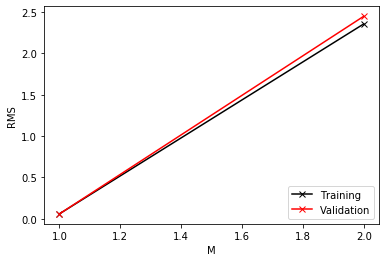

In [207]:
#======== 2-1.(a) ===========//
print ("//===================//")
print ("//       2-1(a)      //")
print ("//===================//")

phi_for_M1, phi_for_M2 = phi_POLY(train_x)

w_ML1 = np.dot(np.dot(inv(np.dot(phi_for_M1.T, phi_for_M1)), phi_for_M1.T), train_t)
w_ML2 = np.dot(np.dot(inv(np.dot(phi_for_M2.T, phi_for_M2)), phi_for_M2.T), train_t)

range_M = [1,2]
RMS_train = [prediction(train_x, train_t, 1, w_ML1), prediction(train_x, train_t, 2, w_ML2)]
RMS_test  = [prediction(test_x, test_t, 1, w_ML1), prediction(test_x, test_t, 2, w_ML2)]

print("Weight：")
print("〔when M = 1〕：\n", w_ML1)
print("〔when M = 2〕：\n", w_ML2)
print("\n")

print ("〔Training data result〕:")
for m,error in zip(range_M, RMS_train):
    print ("M = ", m, "   RMS = ", error)
print ("〔Testing data result〕:")
for m,error in zip(range_M, RMS_test):
    print ("M = ", m, "   RMS = ", error)
print("\n")

%matplotlib inline
plt.figure()
plt.xlabel('M')
plt.ylabel('RMS')
plt.plot(range_M, RMS_train, color='black', marker="x", label='Training')
plt.plot(range_M, RMS_test, color='red', marker="x", label='Validation')
plt.legend(loc=4)
plt.show()

//===================//
//       2-1(b)      //
//===================//
RMS of training REMOVE sth.
[1.181061578254035, 2.1360553662089106, 2202591784.9089675, 0.5218509619496206, 0.6612499210097312, 0.7858752738384913, 0.058321150460022286]
The most contributive attribte is: University_rating


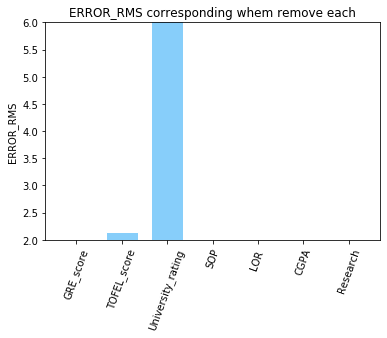

In [208]:
#======== 2-1.(b) ===========//
print ("//===================//")
print ("//       2-1(b)      //")
print ("//===================//")

remove_x = [np.delete(train_x, 0, 1), np.delete(train_x, 1, 1), np.delete(train_x, 2, 1),np.delete(train_x, 3, 1),\
            np.delete(train_x, 4, 1), np.delete(train_x, 5, 1), np.delete(train_x, 6, 1)]

_,phi2_x1 = phi_POLY(remove_x[0])
_,phi2_x2 = phi_POLY(remove_x[1])
_,phi2_x3 = phi_POLY(remove_x[2])
_,phi2_x4 = phi_POLY(remove_x[3])
_,phi2_x5 = phi_POLY(remove_x[4])
_,phi2_x6 = phi_POLY(remove_x[5])
_,phi2_x7 = phi_POLY(remove_x[6])

RMS_train_REMOVE = [ prediction(remove_x[0], train_t, 2, np.dot(np.dot(inv(np.dot(phi2_x1.T, phi2_x1)), phi2_x1.T), train_t)),\
                     prediction(remove_x[1], train_t, 2, np.dot(np.dot(inv(np.dot(phi2_x2.T, phi2_x2)), phi2_x2.T), train_t)),\
                     prediction(remove_x[2], train_t, 2, np.dot(np.dot(inv(np.dot(phi2_x3.T, phi2_x3)), phi2_x3.T), train_t)),\
                     prediction(remove_x[3], train_t, 2, np.dot(np.dot(inv(np.dot(phi2_x4.T, phi2_x4)), phi2_x4.T), train_t)),\
                     prediction(remove_x[4], train_t, 2, np.dot(np.dot(inv(np.dot(phi2_x5.T, phi2_x5)), phi2_x5.T), train_t)),\
                     prediction(remove_x[5], train_t, 2, np.dot(np.dot(inv(np.dot(phi2_x6.T, phi2_x6)), phi2_x6.T), train_t)),\
                     prediction(remove_x[6], train_t, 2, np.dot(np.dot(inv(np.dot(phi2_x7.T, phi2_x7)), phi2_x7.T), train_t)),\
                    ]

idx = np.argmax(RMS_train_REMOVE)
print("RMS of training REMOVE sth.")
print(RMS_train_REMOVE)

label = ['GRE_score', 'TOFEL_score', 'University_rating', 'SOP','LOR ', 'CGPA', 'Research']
x_idx = np.arange(0, 7)

print("The most contributive attribte is: %s" %label[idx])
plt.figure()
plt.title('ERROR_RMS corresponding whem remove each')
plt.ylabel('ERROR_RMS')
plt.xticks(x_idx, label, rotation=70)
plt.ylim(2, 6)
plt.bar(x_idx, RMS_train_REMOVE, facecolor='lightskyblue', edgecolor='white', label='x', width=0.7)
plt.show()

## 【Maximum Likelihood approach (2-2) 】

In [209]:
#fetch training data and target from dataset_X.csv and dataset_T.csv
data_x, data_t = loaddata('data_X.csv', 'data_T.csv')
N = data_x.shape[0]
data_x = data_x[1:,1:]
data_t = data_t[1:,1:]
#print(data_x.shape)
#print(data_t.shape)
#divide training set and validation set
train_x, val_x, train_t, val_t = splitdata_M1(data_x, data_t, N-1, 0.8)

//===================================//
//             2-2.(a,b)             //
//===================================//
//=== maximum likelihood approach ===//
//===================================//
//===> train_error_ml_1d = 0.06256452393106708
//===> validation_error_ml_1d = 0.05417647185084512
//================================================//
//===> train_error_ml_2d = 0.060428075264598716
//===> validation_error_ml_2d = 0.04914900534691331
//================================================//


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in double_scalars


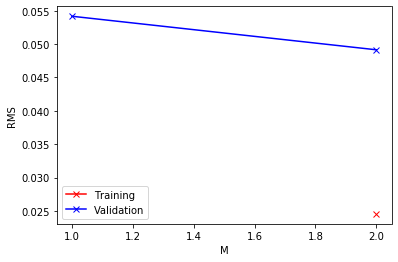

In [210]:
#======== 2-2.(a,b) ===========//
print ("//===================================//")
print ("//             2-2.(a,b)             //")
print ("//===================================//")
print ("//=== maximum likelihood approach ===//")
print ("//===================================//")

#================= M=1 ====================
#training_set normalization and operate sigmoid
train_x, val_x, train_t, val_t = splitdata_M1(data_x, data_t, N-1, 0.7)
train_x_ml_1d = train_x[:, 1:]
# print(train_x_ml_1d)
# print(train_x_ml_1d.shape)
mean_ml_1d_t, std_ml_1d_t = mean_std(train_x_ml_1d)
# print(mean_ml_1d)
# print(std_ml_1d)
normalization_result_t = normalization(train_x_ml_1d, mean_ml_1d_t, std_ml_1d_t)
#print(normalization_result)
# print(normalization_result.shape)
sigmoid_result_t = sigmoid_op(normalization_result_t)

#training set split data
train_x_ml, val_x_ml, train_t_ml, val_t_ml = splitdata_M1(sigmoid_result_t, train_t, 350, 1)
#calaulate Wml_ml_1d
wml_ml_1d = linear_regression_1d_wml(train_x_ml, train_t_ml)
#print(wml_ml_1d.shape)
#print(train_x_ml.shape)
train_error_ml_1d, val_error_ml_1d = linear_regression_error(train_x_ml, wml_ml_1d, train_t_ml, 350, 1)
print("//===> train_error_ml_1d =", train_error_ml_1d)

#validation_set normalization and operate sigmoid
val_x_ml_1d = val_x[:, 1:]
#print(val_x_ml_1d)
mean_ml_1d_v, std_ml_1d_v = mean_std(val_x_ml_1d)
normalization_result_v = normalization(val_x_ml_1d, mean_ml_1d_v, std_ml_1d_v)
sigmoid_result_v = sigmoid_op(normalization_result_v)
#validation set split data
train_x_ml, val_x_ml, train_t_ml, val_t_ml = splitdata_M1(sigmoid_result_v, val_t, 150, 0)
train_error_ml_1d, val_error_ml_1d = linear_regression_error(val_x_ml, wml_ml_1d, val_t_ml, 150, 0)
print("//===> validation_error_ml_1d =", val_error_ml_1d)
print ("//================================================//")

#====================== M=2 ==============================
m2d = linear_regression_m2d(data_x)
m2d_bias = np.ones((500, 1))
data_x_m2 = np.append(np.append(m2d_bias, data_x, axis=1), m2d, axis=1)

train_x_ml_2d, val_x_ml_2d, train_t_ml_2d, val_t_ml_2d = splitdata_M2(data_x_m2, data_t)
train_x_ml_2d_del1 = train_x_ml_2d[:, 1:]

wml_2d_ml_2d = linear_regression_2d_wml(train_x_ml_2d_del1, train_t_m2)
(train_error_ml_2d, val_error_ml_2d) = linear_regression_error(train_x_ml_2d_del1, wml_2d_ml_2d, train_t_ml_2d, N, 0.8)
print("//===> train_error_ml_2d =", train_error_ml_2d)
train_error_ml_2d, val_error_ml_2d = linear_regression_error(val_x_m2, wml_2d, val_t_m2, N, 0.8)
print("//===> validation_error_ml_2d =", val_error_ml_2d)
print ("//================================================//")

range_M = [1,2]
RMS_train = [train_error_ml_1d, train_error_ml_2d]
RMS_test  =  [val_error_ml_1d, val_error_ml_2d]   
    
%matplotlib inline
plt.figure()
plt.xlabel('M')
plt.ylabel('RMS')
plt.plot(range_M, RMS_train,color='red',marker = "x",label='Training')
plt.plot(range_M, RMS_test,color='blue',marker= "x",label='Validation')
plt.legend(loc=0)
plt.show()

In [211]:
#======== 2-2.(c) ===========//
print ("//=================================//")
print ("//             2-2.(c)             //")
print ("//=================================//")
print ("//===  N-fold cross-validation  ===//")
print ("//=================================//")
#====================== N-fold ==================================
batch = 100
average_training_error = 0
average_validation_error = 0
for i in range(0 ,500, batch):
    train_x_nfold = np.delete(data_x, slice(i, i+batch), axis=0)
    train_t_nfold = np.delete(data_t, slice(i, i+batch), axis=0)
    val_x_nfold = data_x[i:i+batch, :]
    val_t_nfold = data_t[i:i+batch, :]
    #normalization and sigmoid training set
    mean_nfold_t, std_nfold_t = mean_std(train_x_nfold)
    normalization_nfold_t = normalization(train_x_nfold, mean_nfold_t, std_nfold_t)
    sigmoid_nfold_t = sigmoid_op(normalization_nfold_t)
    #normalization and sigmoid validation set
    mean_nfold_v, std_nfold_v = mean_std(val_x_nfold)
    normalization_nfold_v = normalization(val_x_nfold, mean_nfold_v, std_nfold_v)
    sigmoid_nfold_v = sigmoid_op(normalization_nfold_v)

    #training set split data
    train_x_ml_nfold, val_x_ml_nfold, train_t_ml_nfold, val_t_ml_nfold = splitdata_M1(sigmoid_nfold_t, train_t_nfold, 400, 1)
    #calaulate Wml_ml_1d
    wml_ml_1d_nfold = linear_regression_1d_wml(train_x_ml_nfold, train_t_ml_nfold)
    train_error_ml_1d_nfold, val_error_ml_1d_nfold = linear_regression_error(train_x_ml_nfold, wml_ml_1d_nfold, train_t_ml_nfold, 226, 1)
    print("//=> train_error_ml_1d_nfold =", train_error_ml_1d_nfold)
    average_training_error = average_training_error + train_error_ml_1d_nfold

    train_x_ml_nfold, val_x_ml_nfold, train_t_ml_nfold, val_t_ml_nfold = splitdata_M1(sigmoid_nfold_v, val_t_nfold, 100, 0)
    train_error_ml_1d_nfold, val_error_ml_1d_nfold = linear_regression_error(val_x_ml_nfold, wml_ml_1d_nfold, val_t_ml_nfold, 100, 0)
    print("//=> validation_error_ml_1d_nfold =", val_error_ml_1d_nfold)
    print("--------------------------------------------------")
    average_validation_error = average_validation_error + val_error_ml_1d_nfold
print("//============================================================//")
print("//===> average_training_error =", average_training_error/4)
print("//===> average_validation_error =", average_validation_error/4)
print("//============================================================//")

//=================================//
//             2-2.(c)             //
//=================================//
//===  N-fold cross-validation  ===//
//=================================//
//=> train_error_ml_1d_nfold = 0.062145397707754575
//=> validation_error_ml_1d_nfold = 0.09873281010138148
--------------------------------------------------
//=> train_error_ml_1d_nfold = 0.0806742914955343
//=> validation_error_ml_1d_nfold = 0.07267986447451384
--------------------------------------------------
//=> train_error_ml_1d_nfold = 0.08455363127491465
//=> validation_error_ml_1d_nfold = 0.05128056841817997
--------------------------------------------------
//=> train_error_ml_1d_nfold = 0.07974089792208586
//=> validation_error_ml_1d_nfold = 0.06083479736761294
--------------------------------------------------
//=> train_error_ml_1d_nfold = 0.08400277221268905
//=> validation_error_ml_1d_nfold = 0.04486674564661924
--------------------------------------------------
//==================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in double_scalars


## 【Maximum a posterior approach (2-3) 】

//=============================//
//           2-2.(a,b)         //
//=============================//
//===  Maximum a posteriori ===//
//=============================//
//=> train_error_ml_1d_post = 0.07838047839749457
//=> validation_error_ml_1d_post = 0.07197337803780822
--------------------------------------------------
//=> train_error_ml_2d_post = 0.06044030126551411
//=> validation_error_ml_2d_post = 0.04914900534691331


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in double_scalars


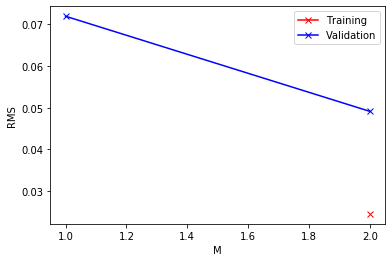

In [199]:
#======== 2-2.(a,b) ===========//
print ("//=============================//")
print ("//           2-2.(a,b)         //")
print ("//=============================//")
print ("//===  Maximum a posteriori ===//")
print ("//=============================//")
#================= Maximum a posteriori ============================
train_x, val_x, train_t, val_t = splitdata_M1(data_x, data_t, N-1, 0.7)
train_x_ml_1d = train_x[:, 1:]
mean_ml_1d_t, std_ml_1d_t = mean_std(train_x_ml_1d)
normalization_result_t = normalization(train_x_ml_1d, mean_ml_1d_t, std_ml_1d_t)
sigmoid_result_t = sigmoid_op(normalization_result_t)

#training set split data
train_x_ml, val_x_ml, train_t_ml, val_t_ml = splitdata_M1(sigmoid_result_t, train_t, 350, 1)
#calaulate Wml_ml_1d
wml_ml_1d = linear_regression_post_wml(train_x_ml, train_t_ml)
#print(wml_ml_1d.shape)
#print(train_x_ml.shape)
train_error_ml_1d, val_error_ml_1d = linear_regression_error(train_x_ml, wml_ml_1d, train_t_ml, 350, 1)
print("//=> train_error_ml_1d_post =", train_error_ml_1d)


#validation_set normalization and operate sigmoid
val_x_ml_1d = val_x[:, 1:]
#print(val_x_ml_1d)
mean_ml_1d_v, std_ml_1d_v = mean_std(val_x_ml_1d)
normalization_result_v = normalization(val_x_ml_1d, mean_ml_1d_v, std_ml_1d_v)
sigmoid_result_v = sigmoid_op(normalization_result_v)
#validation set split data
train_x_ml, val_x_ml, train_t_ml, val_t_ml = splitdata_M1(sigmoid_result_v, val_t, 150, 0)
train_error_ml_1d, val_error_ml_1d = linear_regression_error(val_x_ml, wml_ml_1d, val_t_ml, 150, 0)
print("//=> validation_error_ml_1d_post =", val_error_ml_1d)
print("--------------------------------------------------")

#============= M=2 ======================
m2d = linear_regression_m2d(data_x)
m2d_bias = np.ones((500, 1))
data_x_m2 = np.append(np.append(m2d_bias, data_x, axis=1), m2d, axis=1)

train_x_ml_2d, val_x_ml_2d, train_t_ml_2d, val_t_ml_2d = splitdata_M2(data_x_m2, data_t)

train_x_ml_2d_del1 = train_x_ml_2d[:, 1:]
wml_2d_ml_2d = linear_regression_2d_wml_post(train_x_ml_2d_del1, train_t_m2)
(train_error_ml_2d, val_error_ml_2d) = linear_regression_error(train_x_ml_2d_del1, wml_2d_ml_2d, train_t_ml_2d, N, 0.8)
print("//=> train_error_ml_2d_post =", train_error_ml_2d)
train_error_ml_2d, val_error_ml_2d = linear_regression_error(val_x_m2, wml_2d, val_t_m2, N, 0.8)
print("//=> validation_error_ml_2d_post =", val_error_ml_2d)
print("====================================================")

m_l = [1,2]
RMS_train = [train_error_ml_1d, train_error_ml_2d]
RMS_test =  [val_error_ml_1d, val_error_ml_2d]   
    
%matplotlib inline
plt.figure()
plt.xlabel('M')
plt.ylabel('RMS')
plt.plot(m_l, RMS_train, color='red', marker = "x", label='Training')
plt.plot(m_l, RMS_test, color='blue', marker= "x", label='Validation')
plt.legend(loc=0)
plt.show()

In [200]:
#======== 2-3.(c) ===========//
print ("//=================================//")
print ("//             2-3.(c)             //")
print ("//=================================//")
print ("//===  N-fold cross-validation  ===//")
print ("//=================================//")

batch = 100
average_training_error = 0
average_validation_error = 0
for i in range(0 ,500, batch):
    train_x_nfold = np.delete(data_x, slice(i, i+batch), axis=0)
    train_t_nfold = np.delete(data_t, slice(i, i+batch), axis=0)
    val_x_nfold = data_x[i:i+batch, :]
    val_t_nfold = data_t[i:i+batch, :]
    #normalization and sigmoid training set
    mean_nfold_t, std_nfold_t = mean_std(train_x_nfold)
    normalization_nfold_t = normalization(train_x_nfold, mean_nfold_t, std_nfold_t)
    sigmoid_nfold_t = sigmoid_op(normalization_nfold_t)
    #normalization and sigmoid validation set
    mean_nfold_v, std_nfold_v = mean_std(val_x_nfold)
    normalization_nfold_v = normalization(val_x_nfold, mean_nfold_v, std_nfold_v)
    sigmoid_nfold_v = sigmoid_op(normalization_nfold_v)


    #training set split data
    train_x_ml_nfold, val_x_ml_nfold, train_t_ml_nfold, val_t_ml_nfold = splitdata_M1(sigmoid_nfold_t, train_t_nfold, 400, 1)
    #calaulate Wml_ml_1d
    wml_ml_1d_nfold = linear_regression_post_wml(train_x_ml_nfold, train_t_ml_nfold)
    train_error_ml_1d_nfold, val_error_ml_1d_nfold = linear_regression_error(train_x_ml_nfold, wml_ml_1d_nfold, train_t_ml_nfold, 400, 1)
    print("//=> train_error_ml_1d_nfold =", train_error_ml_1d_nfold)
    average_training_error = average_training_error + train_error_ml_1d_nfold
    train_x_ml_nfold, val_x_ml_nfold, train_t_ml_nfold, val_t_ml_nfold = splitdata_M1(sigmoid_nfold_v, val_t_nfold, 100, 0)
    train_error_ml_1d_nfold, val_error_ml_1d_nfold = linear_regression_error(val_x_ml_nfold, wml_ml_1d_nfold, val_t_ml_nfold, 100, 0)
    print("//=> validation_error_ml_1d_nfold =", val_error_ml_1d_nfold)
    print("--------------------------------------------------")
    average_validation_error = average_validation_error + val_error_ml_1d_nfold
    
print("====================================================")
print("average_training_error =", average_training_error/4)
print("average_validation_error =", average_validation_error/4)
print("====================================================")

//=================================//
//             2-3.(c)             //
//=================================//
//===  N-fold cross-validation  ===//
//=================================//
//=> train_error_ml_1d_nfold = 0.06238544916062084
//=> validation_error_ml_1d_nfold = 0.11295272263623703
--------------------------------------------------
//=> train_error_ml_1d_nfold = 0.07885215740275954
//=> validation_error_ml_1d_nfold = 0.07629873917753936
--------------------------------------------------
//=> train_error_ml_1d_nfold = 0.0799256992723335
//=> validation_error_ml_1d_nfold = 0.06194711573123125
--------------------------------------------------
//=> train_error_ml_1d_nfold = 0.07756156328669339
//=> validation_error_ml_1d_nfold = 0.072510279672909
--------------------------------------------------
//=> train_error_ml_1d_nfold = 0.07844583113056526
//=> validation_error_ml_1d_nfold = 0.06711123227376133
--------------------------------------------------
average_training_error 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in double_scalars
